## EDA

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [68]:
df2015 = pd.read_csv('Data/TouristArrival2015.csv')
df2016 = pd.read_csv('Data/TouristArrival2016.csv')
df2017 = pd.read_csv('Data/TouristArrival2017.csv')
df2018 = pd.read_csv('Data/TouristArrival2018.csv')
df2019 = pd.read_csv('Data/TouristArrival2019.csv')
df2020 = pd.read_csv('Data/TouristArrival2020.csv')
dfAirPassenger = pd.read_csv('Data/thailand_air_passengers.csv')
dfDT = pd.read_csv('Data/thailand_domestic_tourism_2019_2023_ver2.csv')
dfDT

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,ratio_tourist_stay,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,ratio_tourist_stay,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,ratio_tourist_stay,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,ratio_tourist_stay,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,ratio_tourist_stay,79.31
...,...,...,...,...,...,...,...
30795,2022-12-01,อุบลราชธานี,Ubon Ratchathani,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,2480000.00
30796,2022-12-01,สกลนคร,Sakon Nakhon,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,3520000.00
30797,2022-12-01,ยโสธร,Yasothon,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,210000.00
30798,2022-12-01,อำนาจเจริญ,Amnat Charoen,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,660000.00


In [69]:
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)
print(df2020.shape)
print(dfAirPassenger.shape)
print(dfDT.shape)
print(df2015.dtypes)
print(df2016.dtypes)
print(df2017.dtypes)
print(df2018.dtypes)
print(df2020.dtypes)
print(dfAirPassenger.dtypes)
print(dfDT.dtypes)
dfList = {'2015':df2015, '2016':df2016, '2017':df2017, '2018':df2018, '2019':df2019, '2020':df2020, 'AP':dfAirPassenger, 'DT':dfDT}

(54, 8)
(54, 8)
(54, 8)
(54, 8)
(54, 8)
(26, 4)
(30800, 7)
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Receipts(Mil. $US)        object
Region                            object
dtype: object
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Receipts(Mil. $US)        object
Region                            object
dtype: object
Country of Residence              object
No. of Arrivals                   object
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)     object
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)       object
Tourism Rec

In [70]:
toChange = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)']
for key in dfList.keys():
    df = dfList[key]
    for temp in toChange:
        try:
            df[temp] = df[temp].str.replace(",", "")
            df[temp] = pd.to_numeric(df[temp], errors="coerce")
        except:
            continue
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(total_missing)
    print(key)
    print('-----------------------------')

0
2015
-----------------------------
0
2016
-----------------------------
0
2017
-----------------------------
0
2018
-----------------------------
0
2019
-----------------------------
0
2020
-----------------------------
0
AP
-----------------------------
0
DT
-----------------------------


In [71]:
df2018["year"] = 2018
df2019["year"] = 2019
df2020["year"] = 2020
df2017["year"] = 2017
df2016["year"] = 2016
df2015["year"] = 2015

for df in [df2015, df2016, df2017, df2018, df2019, df2020]:
    
    new_row = ['Other', df["No. of Arrivals"].sum(), df['Length of Stay(Days)'].mean(), 
               df['Per Capita Spending(Baht/Day)'].mean(), df['Per Capita Spending($US/Day)'].mean(), 
               df['Tourism Receipts(Mil. Baht)'].sum(), df['Tourism Receipts(Mil. $US)'].sum(), 'Total', df['year'][1]]
    
        # new_row = {"Country of Residence": 'Other', 
        #        "No. of Arrivals": df["No. of Arrivals"].sum(), 
        #        'Length of Stay(Days)': df['Length of Stay(Days)'].mean(), 
        #        'Per Capita Spending(Baht/Day)': df['Per Capita Spending(Baht/Day)'].mean(), 
        #        'Per Capita Spending($US/Day)': df['Per Capita Spending($US/Day)'].mean(), 
        #        'Tourism Receipts(Mil. Baht)': df['Tourism Receipts(Mil. Baht)'].sum(), 
        #        'Tourism Receipts(Mil. $US)': df['Tourism Receipts(Mil. $US)'].sum(), 
        #        'Region': 'Total', 
        #        'year': df['year'][1]}
    df.loc[len(df.index)] = new_row
    print(df)

dfNationality = pd.concat([df2015, df2016, df2017, df2018, df2019, df2020], ignore_index=True)
dfList['integrated']=dfNationality
numList = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Per Capita Spending($US/Day)', 'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)']




dfNationality



     Country of Residence  No. of Arrivals  Length of Stay(Days)  \
0                   Asean          5631128              5.990000   
1                  Brunei            15394              6.970000   
2                Cambodia           519841              6.500000   
3               Indonesia           320519              6.070000   
4                    Laos          1187321              5.830000   
5                Malaysia          1653575              5.170000   
6                 Myanmar           234602              8.540000   
7             Philippines           240880              8.620000   
8               Singapore           924784              5.710000   
9                 Vietnam           534212              6.510000   
10                  China          4395183              9.370000   
11              Hong Kong           580046              6.630000   
12                  Japan          1140303              8.440000   
13                  Korea           854559      

,Country of Residence,No. of Arrivals,Length of Stay(Days),Per Capita Spending(Baht/Day),Per Capita Spending($US/Day),Tourism Receipts(Mil. Baht),Tourism Receipts(Mil. $US),Region,year
0,Asean,5631128,5.990,5069.300000,148.010000,170989.56,4992.40,Asean,2015
1,Brunei,15394,6.970,5812.980000,169.720000,623.71,18.21,East Asia,2015
2,Cambodia,519841,6.500,4546.430000,132.740000,15362.19,448.53,East Asia,2015
3,Indonesia,320519,6.070,5119.000000,149.460000,9959.28,290.78,East Asia,2015
4,Laos,1187321,5.830,4242.890000,123.880000,29369.60,857.51,East Asia,2015
...,...,...,...,...,...,...,...,...,...
325,U.A.E.,9550,17.100,5173.080000,165.270000,1053.82,33.67,Middle East,2020
326,Others in Middle East,25507,16.700,3896.530000,124.490000,2151.09,68.72,Middle East,2020
327,South Africa,9692,18.980,3368.680000,107.630000,900.69,28.78,Africa,2020
328,Others in Africa,15371,17.780,3073.360000,98.190000,1250.26,39.94,Africa,2020


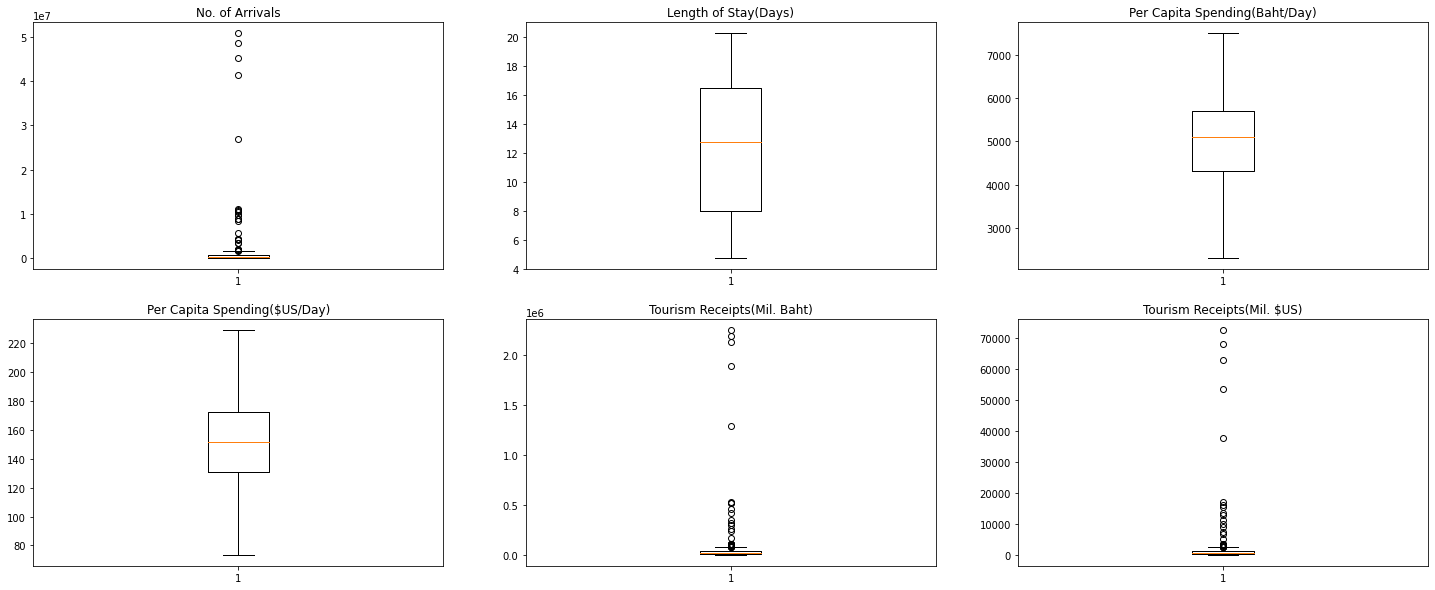

In [72]:
import matplotlib.pyplot as plt

Regions = dfNationality['Region'].unique().tolist()
Countries = dfNationality['Country of Residence'].unique().tolist()
Years = [2015, 2016, 2017, 2018, 2019, 2020]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
i=0
for field in numList:
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(dfNationality[field])
    axes[row, col].set_title(field)
    i+=1
plt.show()

<Figure size 2520x1296 with 0 Axes>

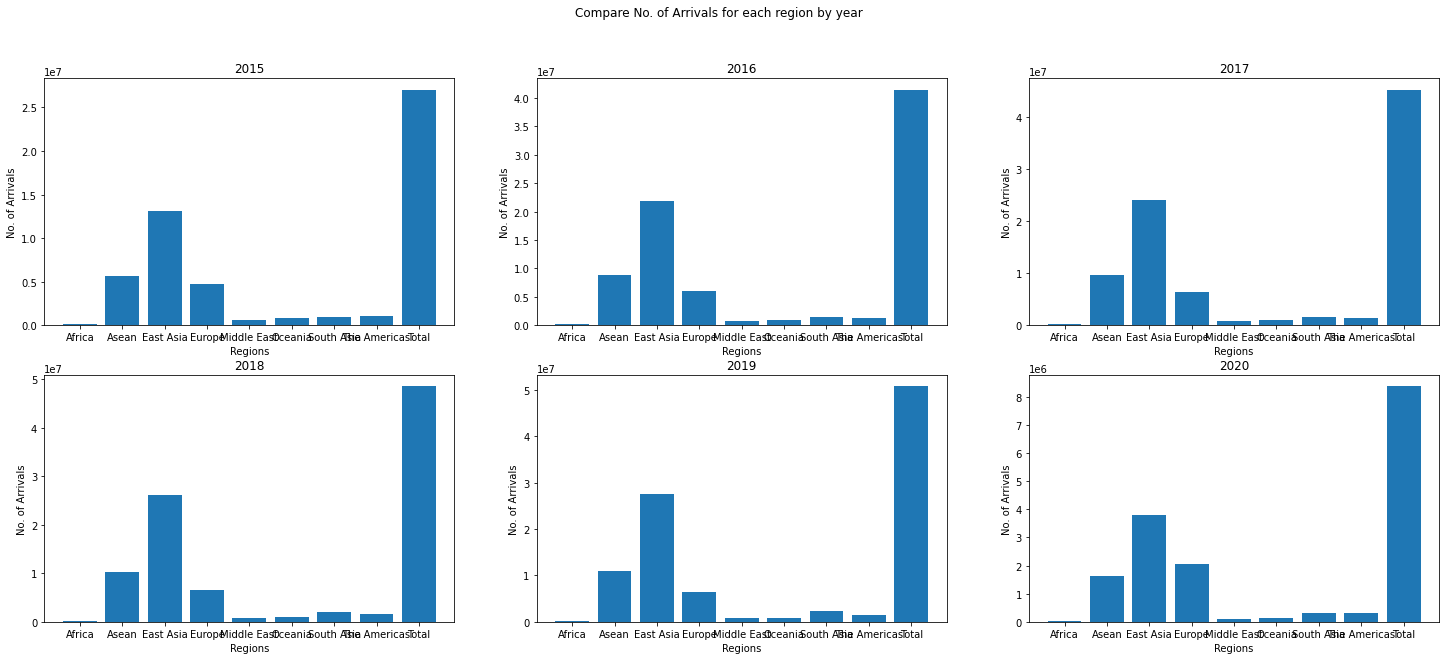

<Figure size 2160x1296 with 0 Axes>

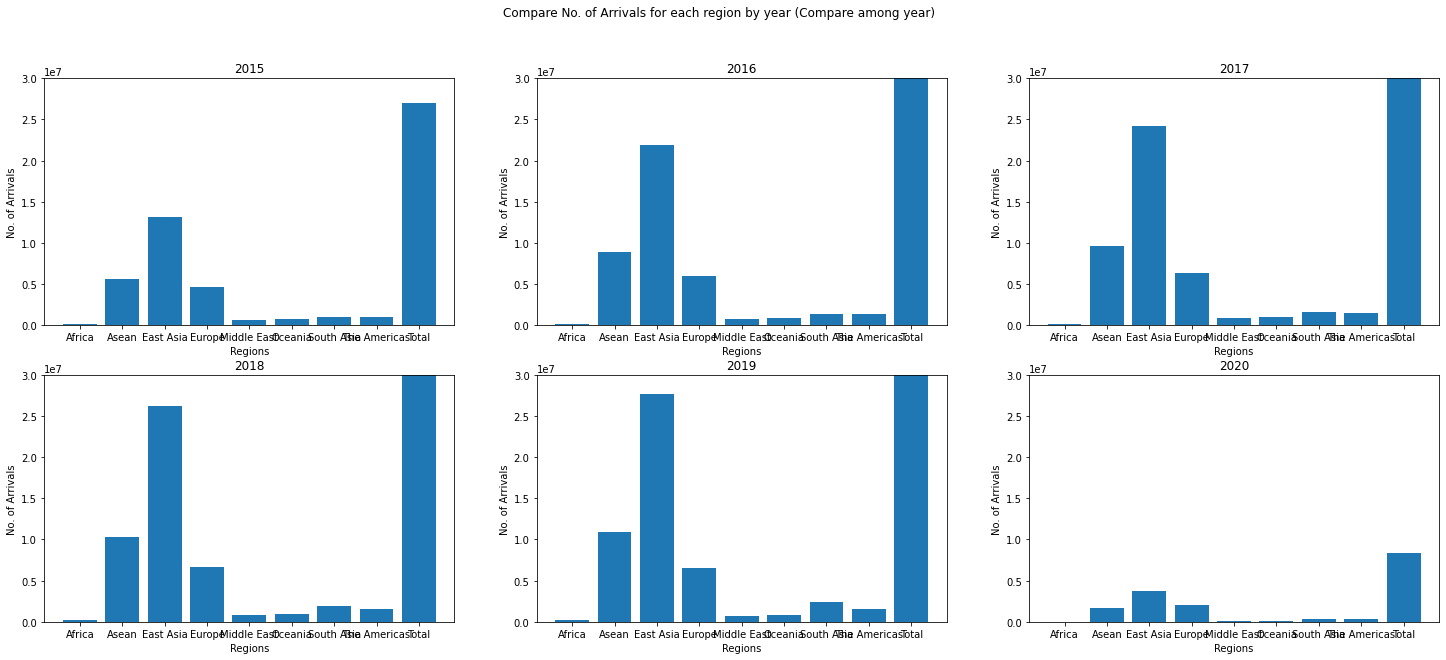

In [73]:

plt.figure(figsize=(35, 18))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
i=0
for year in Years:
    row = i // 3
    col = i % 3
    region_totals = dfList[str(year)].groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    i+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year')
plt.show()


plt.figure(figsize=(30, 18))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
i=0
for year in Years:
    row = i // 3
    col = i % 3
    region_totals = dfList[str(year)].groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    axes[row, col].set_ylim(0, 30000000)
    i+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year (Compare among year)')
plt.show()

<Figure size 2520x1296 with 0 Axes>

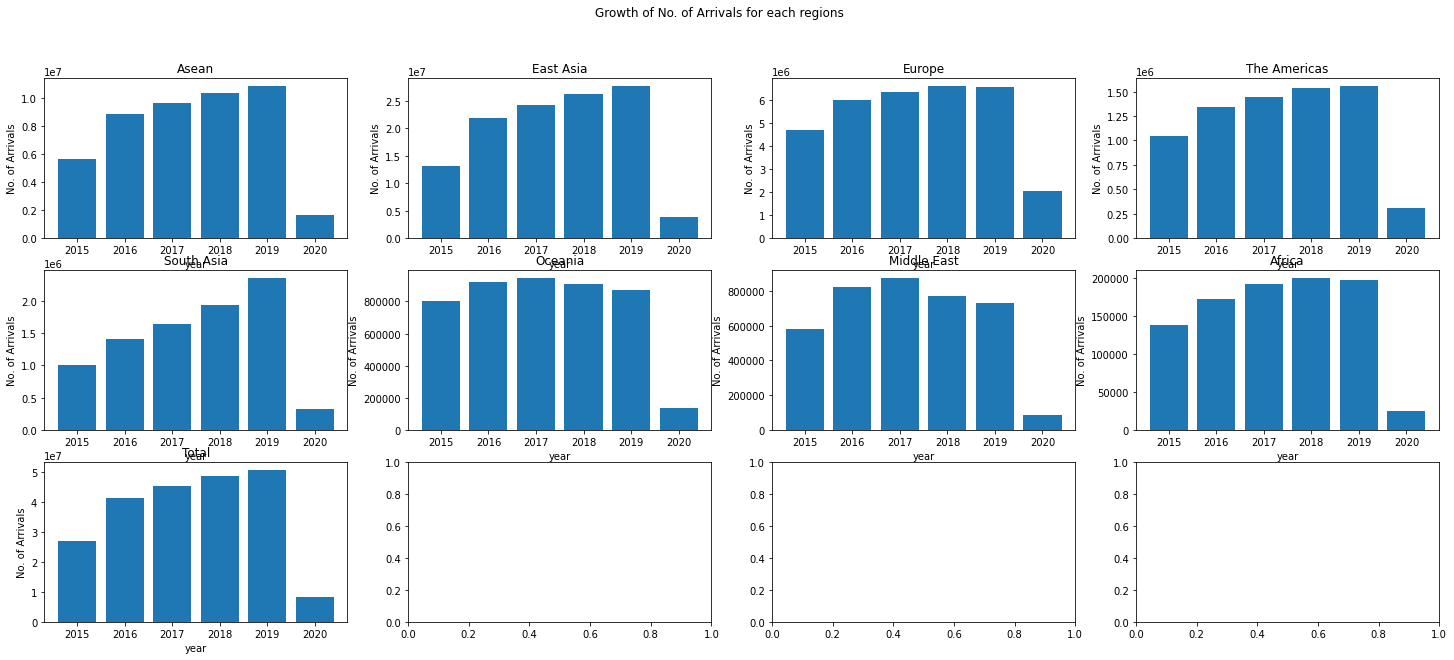

<Figure size 2520x1296 with 0 Axes>

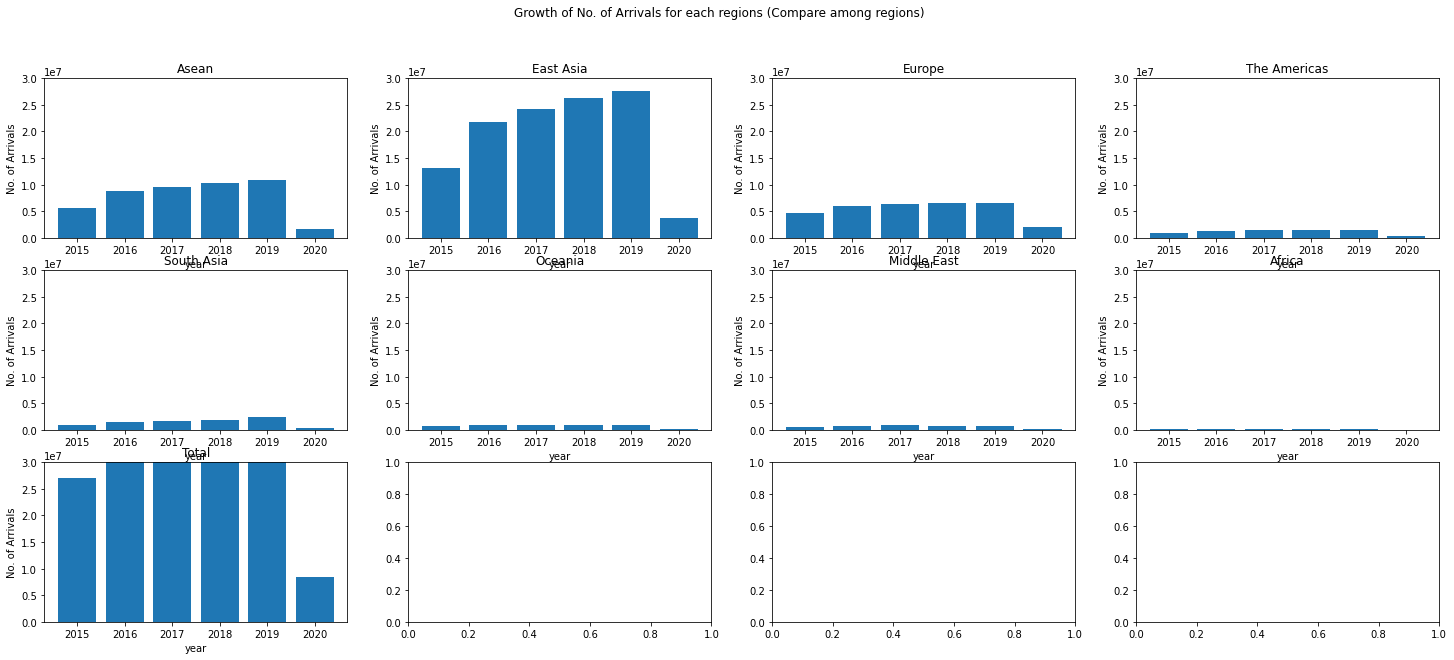

In [74]:
plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))

i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    # axes[row, col].set_ylim(0, 30000000)
    i+=1
plt.suptitle('Growth of No. of Arrivals for each regions')
plt.show()


plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))
i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    axes[row, col].set_ylim(0, 30000000)
    i+=1

plt.suptitle('Growth of No. of Arrivals for each regions (Compare among regions)')
plt.show()

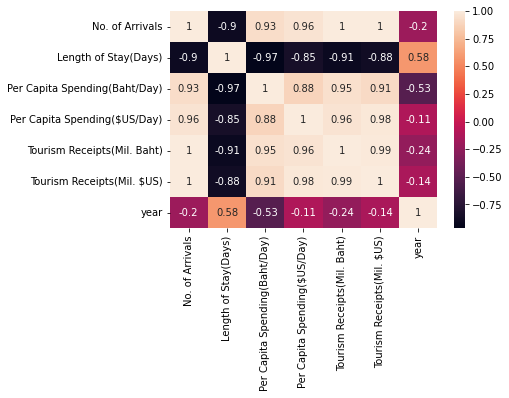

In [75]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [76]:
NumToCountry = {}
CountryToNum = {}
NumToRegion = {}
RegionToNum = {}

for i, country in enumerate(Countries, start=1):
    NumToCountry[i] = country
    CountryToNum[country] = i

for i, region in enumerate(Regions, start=1):
    NumToCountry[i] = region
    RegionToNum[region] = i

def g(country):
    return CountryToNum.get(country, np.nan)

def h(region):
    return RegionToNum.get(region, np.nan)

dfNationality['Country of Residence'] = dfNationality['Country of Residence'].apply(g)
dfNationality['Region'] = dfNationality['Region'].apply(h)
print(dfNationality)


     Country of Residence  No. of Arrivals  Length of Stay(Days)  \
0                       1          5631128                 5.990   
1                       2            15394                 6.970   
2                       3           519841                 6.500   
3                       4           320519                 6.070   
4                       5          1187321                 5.830   
..                    ...              ...                   ...   
325                    51             9550                17.100   
326                    52            25507                16.700   
327                    53             9692                18.980   
328                    54            15371                17.780   
329                    55          8371187                14.345   

     Per Capita Spending(Baht/Day)  Per Capita Spending($US/Day)  \
0                      5069.300000                    148.010000   
1                      5812.980000             

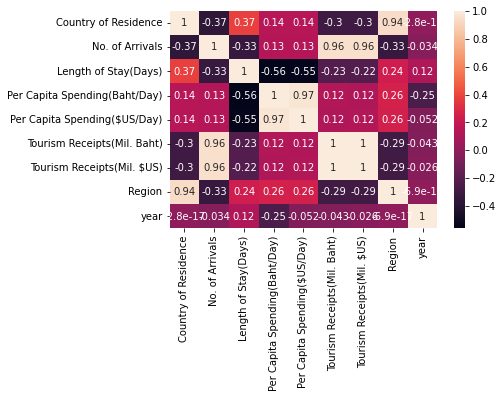

In [77]:
import seaborn as sns


dfNationalityWithoutTotal = dfNationality[dfNationality['Region'] != 9]
sns.heatmap(dfNationalityWithoutTotal.corr(), annot=True)
plt.show()

## model(prepare)

In [78]:
X = dfNationality[["Country of Residence", 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Per Capita Spending($US/Day)',
                   'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)', 'Region', 'year']]
y = dfNationality["No. of Arrivals"]
country = CountryToNum["Japan"]
length_of_stay = 7
per_capita_spending_baht = 5000
per_capita_spending_usd = 100
tourism_receipts_baht = 1000000
tourism_receipts_usd = 200000
region = RegionToNum["East Asia"]
year = 2023
predVal = [country, length_of_stay, per_capita_spending_baht, per_capita_spending_usd,
                    tourism_receipts_baht, tourism_receipts_usd, region, year]

In [79]:
n_list = []
for i in range(1, 11):
    n_list.append(3 + 30*i)

testDf = dfNationalityWithoutTotal.iloc[n_list]
testDf

,Country of Residence,No. of Arrivals,Length of Stay(Days),Per Capita Spending(Baht/Day),Per Capita Spending($US/Day),Tourism Receipts(Mil. Baht),Tourism Receipts(Mil. $US),Region,year
33,34,36254,14.41,5227.02,152.61,2730.70,79.73,4,2015
64,10,863807,5.98,5191.69,147.07,26818.00,759.72,2,2016
94,40,43170,9.58,5106.67,144.66,2111.96,59.83,5,2016
125,16,91918,7.45,6470.32,190.64,4430.80,130.55,2,2017
155,46,7964,13.49,5494.05,161.88,590.25,17.39,6,2017
186,22,872185,17.29,3610.72,111.75,54449.95,1685.24,3,2018
216,52,300677,11.35,6307.93,195.23,21526.97,666.26,7,2018
247,28,279451,19.15,4442.05,143.06,23771.56,765.59,3,2019
278,4,96993,6.81,3875.30,123.81,2644.01,84.47,2,2020
308,34,18200,12.98,3942.95,125.97,999.02,31.92,4,2020


In [80]:
testVals = []
testAns = []
for row in testDf.iterrows():
    # X = dfNationality[["Country of Residence", 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Per Capita Spending($US/Day)',
    #                'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)', 'Region', 'year']]
    # y = dfNationality[0]
    # print(row[1])
    country = row[1][0]
    length_of_stay = row[1][2]
    per_capita_spending_baht = row[1][3]
    per_capita_spending_usd = row[1][4]
    tourism_receipts_baht = row[1][5]
    tourism_receipts_usd = row[1][6]
    region = row[1][7]
    year = row[1][8]
    testVal = [country, length_of_stay, per_capita_spending_baht, per_capita_spending_usd,
                        tourism_receipts_baht, tourism_receipts_usd, region, year]
    testVals.append(testVal)
    testAns.append(row[1][1])

testVals

[[34.0, 14.41, 5227.02, 152.61, 2730.7, 79.73, 4.0, 2015.0],
 [10.0, 5.98, 5191.69, 147.07, 26818.0, 759.72, 2.0, 2016.0],
 [40.0, 9.58, 5106.67, 144.66, 2111.96, 59.83, 5.0, 2016.0],
 [16.0, 7.45, 6470.32, 190.64, 4430.8, 130.55, 2.0, 2017.0],
 [46.0, 13.49, 5494.05, 161.88, 590.25, 17.39, 6.0, 2017.0],
 [22.0, 17.29, 3610.72, 111.75, 54449.95, 1685.24, 3.0, 2018.0],
 [52.0, 11.35, 6307.93, 195.23, 21526.97, 666.26, 7.0, 2018.0],
 [28.0, 19.15, 4442.05, 143.06, 23771.56, 765.59, 3.0, 2019.0],
 [4.0, 6.81, 3875.3, 123.81, 2644.01, 84.47, 2.0, 2020.0],
 [34.0, 12.98, 3942.95, 125.97, 999.02, 31.92, 4.0, 2020.0]]

## model(Regression)

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
#Linear Regression
LRModel = LinearRegression()
LRModel.fit(X, y)
x_pred = np.array([predVal])


LR_pred = LRModel.predict(x_pred)
print(LR_pred)

[69487910.01353304]


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'poly_features__degree': np.arange(1, 10)
}

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best degree:", grid_search.best_params_['poly_features__degree'])

Best degree: 2


In [84]:
poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])

X_poly = poly.fit_transform(X)

PRModel = LinearRegression()
PRModel.fit(X_poly, y)

x_pred = poly.fit_transform(x_pred)

PR_pred = PRModel.predict(x_pred)
print(PR_pred)

[-3.02740438e+11]


In [92]:
#test Linear Socre
testPred = []
for testVal in testVals:
    x_pred = np.array([testVal])
    testPred.append(LRModel.predict(x_pred))

mse = mean_squared_error(testAns, testPred)
r2 = r2_score(testAns, testPred)
# print(testAns)
# print(testPred)
# print(testVals)
# testDf
print(mse)
print(r2)

39784050792.960556
0.6081411385805957


In [93]:
#test Polynomial Socre
testPred = []
for testVal in testVals:
    x_pred = np.array([testVal])
    x_pred = poly.fit_transform(x_pred)
    testPred.append(PRModel.predict(x_pred))

mse = mean_squared_error(testAns, testPred)
r2 = r2_score(testAns, testPred)
# print(testAns)
# print(testPred)
# print(testVals)
# testDf
print(mse)
print(r2)

51112851185.57263
0.4965564523906675
